## Data Exploration

In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pandasql import sqldf
import seaborn as sns

#set-up to be able to run sql queries in Jupyter Notebook
mysql = lambda q: sqldf(q, globals())

In [48]:
main = os.listdir("../smArt/data/wikiart/wikiart/")

genres = []
for genre in main:
    if genre[0] != ".":
        genres.append(genre)

data = sorted(genres)

In [78]:
paintings_list = []

for index, genre in enumerate(data):
    print(f"the genre is {genre}")
    g = os.listdir("../smArt/data/wikiart/wikiart/" + genre)
    
    for i, painting in enumerate(g):
        string = g[i][:-4]
        string = string.replace("-"," ")
        string = string.split("_")
        string.insert(0, genre)
        paintings_list.append(string)
    
        if i % 100 == 0:
            print(i+1)

the genre is Abstract_Expressionism
1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
the genre is Action_painting
1
the genre is Analytical_Cubism
1
101
the genre is Art_Nouveau_Modern
1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
the genre is Baroque
1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
the genre is Color_Field_Painting
1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
the genre is Contemporary_Realism
1
101
201
301
401
the genre is Cubism
1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
the genre is Early_Ren

In [79]:
df = pd.DataFrame(paintings_list)
df = df.drop(columns = [3,4])
df = df.rename(columns = {0:'genre', 1:'artist', 2:'title'})

In [80]:
count = mysql("""SELECT df.genre,
        COUNT(df.genre) AS genre_count
        FROM df 
        GROUP BY df.genre
        ORDER BY genre_count""")

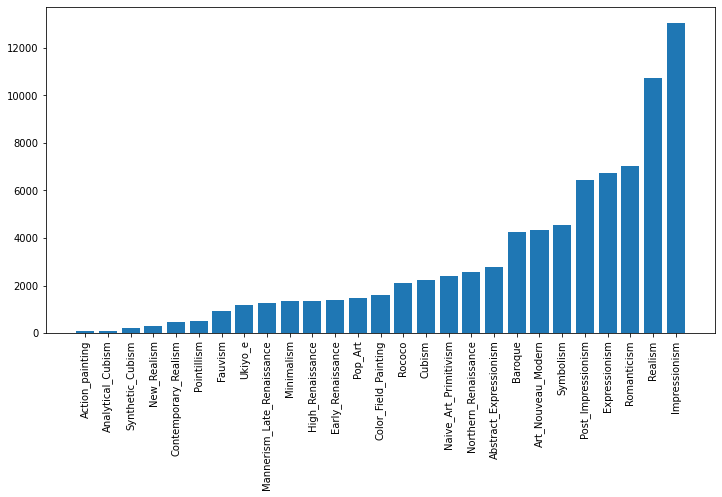

In [105]:
plt.figure(figsize=(12,6))
plt.bar(count['genre'],count['genre_count'])
plt.xticks(count['genre'], rotation=90);

In [119]:
artist_count = mysql("""SELECT df.artist,
        COUNT(df.artist) AS artist_count
        FROM df 
        GROUP BY df.artist
        ORDER BY artist_count DESC
        LIMIT 10""")

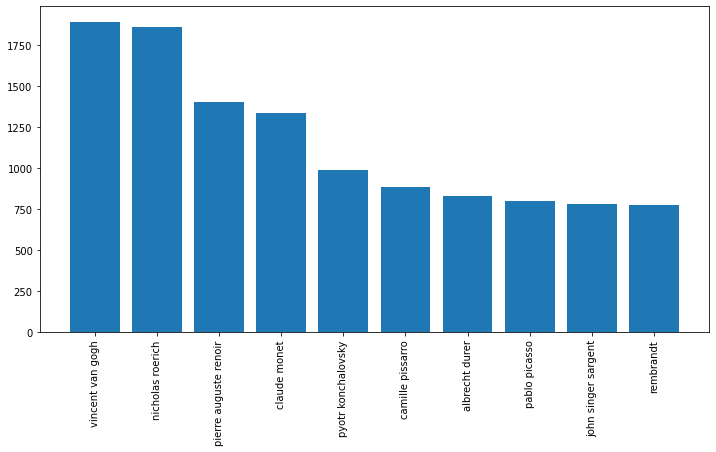

In [120]:
plt.figure(figsize=(12,6))
plt.bar(artist_count['artist'],artist_count['artist_count'])
plt.xticks(artist_count['artist'], rotation=90);

In [134]:
len(df['artist'].unique())

1119